# <center>Universidad Politécnica Salesiana</center>

**Nombre**:Juan Canar

**Docente** Ing. Diego Quisi.

### <center>Desarrollo del Modelo </center> 

-**Formulación del Problema**
. - Determina el objeto de la simulación. Se deben especificar claramente estos elementos:

- Resultados que se esperan del simulador
Se espera que aplicando los modelos matematicos de simulacion(**modelo lineal y modelo logistico**), estos nos ayuden a aproximarnos mas sobre estadisticas en los proximos meses sobre el covid.
- Plan de experimentación
Se establece como plan, realizar una recopilacion de la informacacion desde un csv, y luego en un cuaderno de python hacer los respectivos simulaciones.
- Variables de interés
Las variables de interes son el total que obtendremos en el calculo del modelo lineal y el modelo logistico, estas presentan un calculo que nos serviria para tener una idea proxima de eventos a ocurrir en la pandemia.
- Tipo de perturbaciones a estudiar
El desconocimiento de librerias para poder llevar a cabo el analisis y las variaciones de datos que no son exactos.
- Tratamiento estadístico de los resultados
Para ver de mejor manera estos valores se mandaran a graficar.
- Complejidad del interfaz del simulador
No contiene como tal una interfaz pero, se deden presentar conocimeintos basicos en python.

**Definición del sistema . -** El sistema que se simulará debe estar definido perfectamente. Se debe establecer donde estará la frontera de interacción entre el sistema a estudiar y el medioambiente.

In [28]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom
from datetime import datetime
instanteInicial = datetime.now()

**Formulación del modelo . -** En esta etapa se capturan los aspectos relevantes del sistema real. Estos aspectos dependen de la formulación del problema.

Se analizara datos como las muestras tomadas a cada paciente, estas muestras son por cada paciente que llega con sintomas o personas que se realizan dicha prueba, tambien se tiene los datos probables que existen de muertes confirmadas, pruebas rezagadas, muestras pcr, etc


**Colección de datos . -** La naturaleza y la cantidad de datos se determinan por la formulación del problema y del modelo. Pueden ser obtenidos de registros históricos, experimentos en laboratorio o mediciones realizadas en el sistema real.


In [27]:
# Actualizar los datos (URL)
url = 'ecuacovid.csv'
df = pd.read_csv(url)
df = df.fillna(0)
df


,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,562074,541502,3709,53605,8321,4311,12632,10,176103,167147,...,58331,215,56492,182,54286,144,21260,498,355,30/10/2020
232,567080,546508,5006,53176,8357,4313,12670,38,177148,168192,...,58503,172,56653,161,54471,185,21349,520,348,31/10/2020
233,569362,548790,2282,51707,8371,4313,12684,14,178150,169194,...,58668,165,56836,183,54618,147,21423,531,342,01/11/2020
234,569798,549226,436,50815,8380,4312,12692,8,178518,169562,...,58844,176,57009,173,54777,159,21476,520,342,02/11/2020


**Implementación del modelo en el ordenador . -** Se implementa el modelo a través de un lenguaje de programación/simulación.

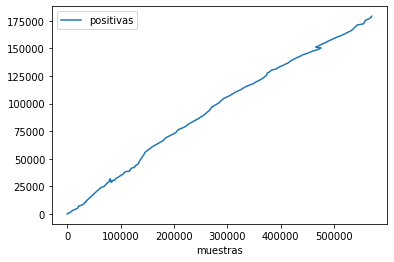

In [33]:
df = df.loc[:,['muestras','positivas']]
FMT = '%Y-%m-%d'
#date = df['muestras']
df
df.plot(x ='muestras', y='positivas')

#### Modelo lineal

In [24]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)
#pdb.set_trace()
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [0.31872296]
Independent term: 
 4093.072591469696


In [35]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

4124


Predicción a 7 días sumando desde el ultimo día en x(30): 4104.865341020039 contagiados


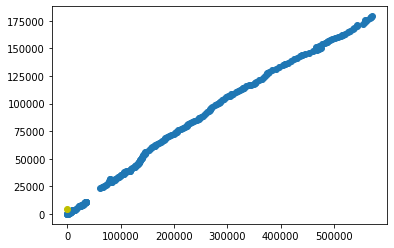

In [39]:
plt.scatter(x, y)
x_real = np.array(range(0,100))
#print(x_real)
puntos=regr.predict(x_real.reshape(-1, 1))
plt.plot(x_real,puntos, color='red')
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

#### Modelo logistico

In [40]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)


(array([-244702.08796256,   27326.51286535]), array([[ 2.43827803e+08, -2.05065445e+07],
       [-2.05065445e+07,  1.75679864e+06]]))


Predicción a 7 días sumando desde el ultimo día en x(30): -145299.54296997195 contagiados


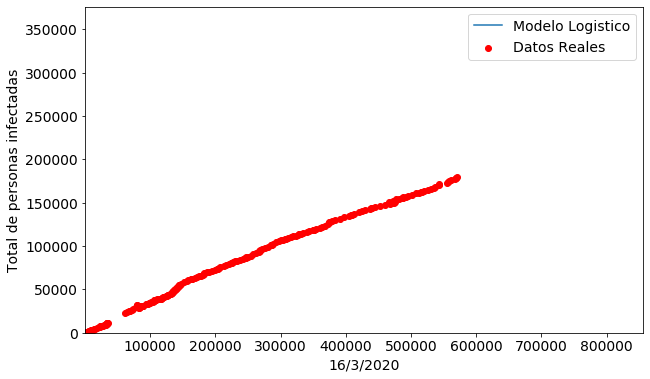

In [41]:
pred_x = list(range(1,100)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
# Real data
pdb.set_trace()
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
puntos=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x,puntos , label="Modelo Logistico" )
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((0,max(y)*2.1))
plt.xlim((min(x),max(x)*1.5)) # Definir los limites de Y
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

**Verificación . -** En esta etapa se verifica que no se hayan cometido errores durante la implementación del modelo. Se usan herramientas de ejecución por pasos (debugging).

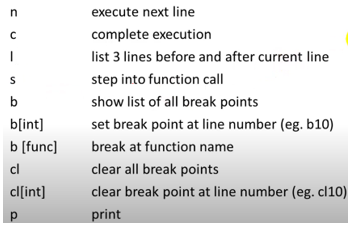

In [8]:
import pdb
pdb.set_trace()

--Call--
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\displayhook.py(252)__call__()
-> def __call__(self, result=None):
(Pdb) n
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\displayhook.py(258)__call__()
-> self.check_for_underscore()
(Pdb) n
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\displayhook.py(259)__call__()
-> if result is not None and not self.quiet():
(Pdb) n
--Return--
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\displayhook.py(259)__call__()->None
-> if result is not None and not self.quiet():
(Pdb) n
--Return--
> <ipython-input-8-b11baede6ec9>(2)<module>()->None
-> pdb.set_trace()
(Pdb) n
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3334)run_code()
-> sys.excepthook = old_excepthook
(Pdb) n
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3350)run_code()
-> outflag = False
(Pdb) n
> c:\users\juan\anaconda3\lib\site-packages\ipython\core\interactiveshell.py(3351)run_c

**Diseño de experimentos . -** Se especifica las características de los experimentos a realizar: tiempo de arranque, tiempo de simulación y número de simulaciones. No se debe incluir la elaboración del conjunto de alternativas a probar para seleccionar la mejor, ya que esto es tarea de la optimización.

Para el diseño de los experimentos, se aplica dos modelos el lineal y el modelo logistico, estos modelos, nos ayudan a determinar tiempos y simular en este caso cuantos casos positivos tendriamos en x cantidad de dias.
Para medir el  tiempo de simulación y número de simulaciones y tiempo de arranque se hace uso de 

In [21]:
#Modelo lineal y modelo logistico
import time

named_tuple = time.localtime() # get struct_time
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)

print('Fecha: ',time_string)

# al final de la partida
instanteFinal = datetime.now()
tiempo = instanteFinal - instanteInicial # Devuelve un objeto timedelta
segundos = tiempo.seconds
print('Tiempo en segundos--> ',segundos)
print('Se realizo un total de 5 simulaciones')

Fecha:  11/06/2020, 12:50:49
Tiempo en segundos-->  136
Se realizo un total de 5 simulaciones


**Experimentación . -** En esta etapa se realizan simulaciones de acuerdo al diseño previo. Se recolectan y procesan los resultados.

Predicción a 7 días sumando desde el ultimo día en x(30): 4104.865341020039 contagiados


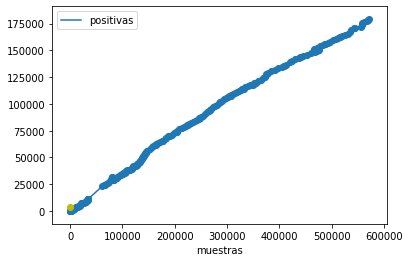

In [25]:
df = df.loc[:,['muestras','positivas']]
FMT = '%Y-%m-%d'
#date = df['muestras']
df
df.plot(x ='muestras', y='positivas')

plt.scatter(x, y)
x_real = np.array(range(0,100))
#print(x_real)
puntos=regr.predict(x_real.reshape(-1, 1))
plt.plot(x_real,puntos, color='red')
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

**Interpretación . -** Se analiza la sensibilidad del modelo con respecto a los parámetros con mayor incertidumbre.

La aplicacion del modelo lineal y logistico de puede ver que, que son modelos que se ajustan a la prediccion pero en si es algo bastante subjetivo, debido a que los datos pueden variar, pero estos datos estan basados en un archivo csv, el cual contiene datos estadisticos de casos posivitos de covid, tambien posee totales de contagios, de pruebas pcr, total de muertes, etc.

**Implementación . -** Se entrega la solución al cliente y se lo capacita en su uso.

Como se puede evidenciar, se ha ido aplicando los pasos para realizar un ejemplo de analisis de casos por covid, estos casos estan analizados aplicando dos algoritmos el de regresion lineal, y el modelo logistico, para dicho analisis se a tomado en cuenta un conjunto de datos que sirve para 

**Documentación . -** Elaboración de documentación técnica y manuales de uso.
En el presente documento se encuentra detallado los pasos seguidos y como de debe ir implementando los metodos para realizar los calculos.


#### Conclusiones:

Como conclusion se puede decir que estos modelos matematicos son herramientas que nos ayudan a simular o predecir en un futuro los eventos que pasaran, aunque cabe recalcar que estos modelos son bastante subjetivos, lo que podria no acertar en su totalidad los datos o ventos a darse, pero si nos podria dar una referencia intermedia para poder tener un concepto claro, de como va ha afectarnos o que probabilidades existen de incremento o decremento, del covid.

Dataset disponible en:
https://github.com/andrab/ecuacovid